In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # 모든 null data를 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Embarked가 null data이므로 채워주기

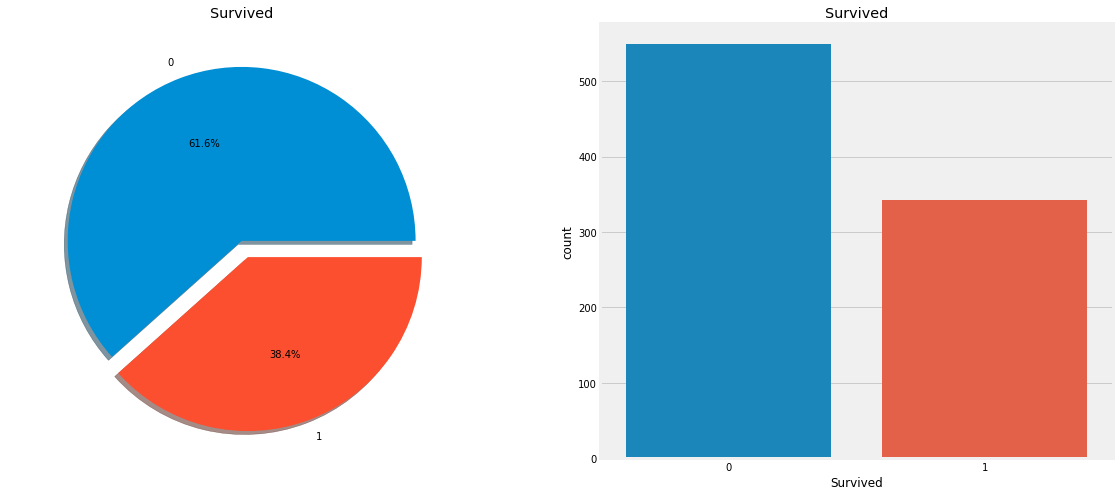

In [5]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data = data, ax= ax[1])
ax[1].set_title('Survived')
plt.show()

- 891명중 38.4%만 생존, 각 class별로 생존과 어떤 상관관계가 있는지 파악해야 한다.
- 그러기 위해서 먼저 특성들의 type를 알아야 한다.

## type of Features
- categorical Feature
    - 범주형 자료 : 두 개 이상의 범주가 있는 변수이다. 
    - Sex (male, female), Embarked(S, C, Q) 등이 여기에 속한다. 
- ordinal Feature(순서형 특성)
    - 범주형 자료와 비슷하지만 각각의 값 간의 상대적 순서 지정 또는 정렬이 가능 (ex : 높음, 중간, 짧음)
    - Pclass (1,2,3)등이 여기에 속함
- continous Feature
    - 연속적으로 나오는 데이터, 항상 최소, 최대값의 사이값들을 구할 수 있다 .
    - age가 여기 속한다.

### Sex -> categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

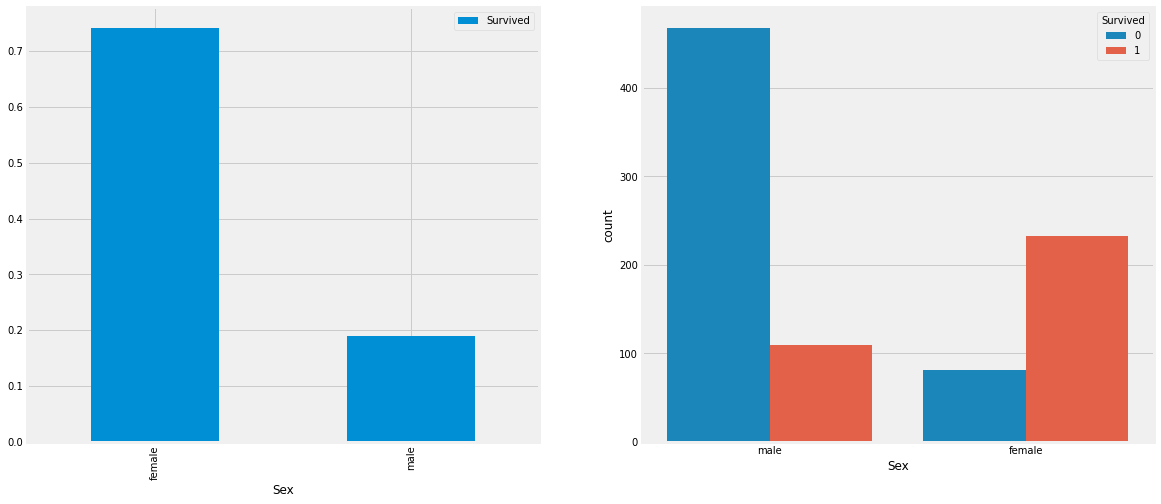

In [7]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
plt.show()

- 남자보다 여자의 생존율이 더 높다.
- 중요한 특성중 하나로 보인다. 
### Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins =True).style.background_gradient(cmap = 'cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass', ylabel='count'>

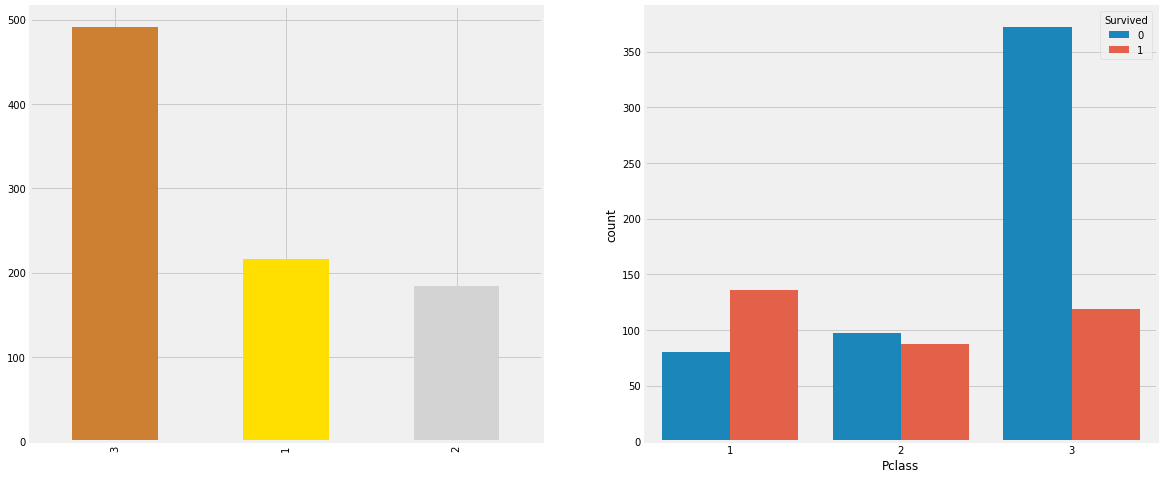

In [9]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
sns.countplot('Pclass', hue = 'Survived', data = data)

- Pclass가 1인 사람, 즉 부자들이 더 많이 살았다. 
- sex와 Pclass를 같이 비교

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap='cool')

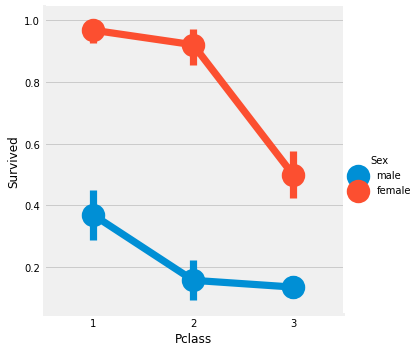

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

- 범주형 데이터를 쉽게 분리가능하기 때문에 factorplot를 사용
- 1등석인데도 남자는 생존률이 낮은걸 확인
### age -> Continous Feature

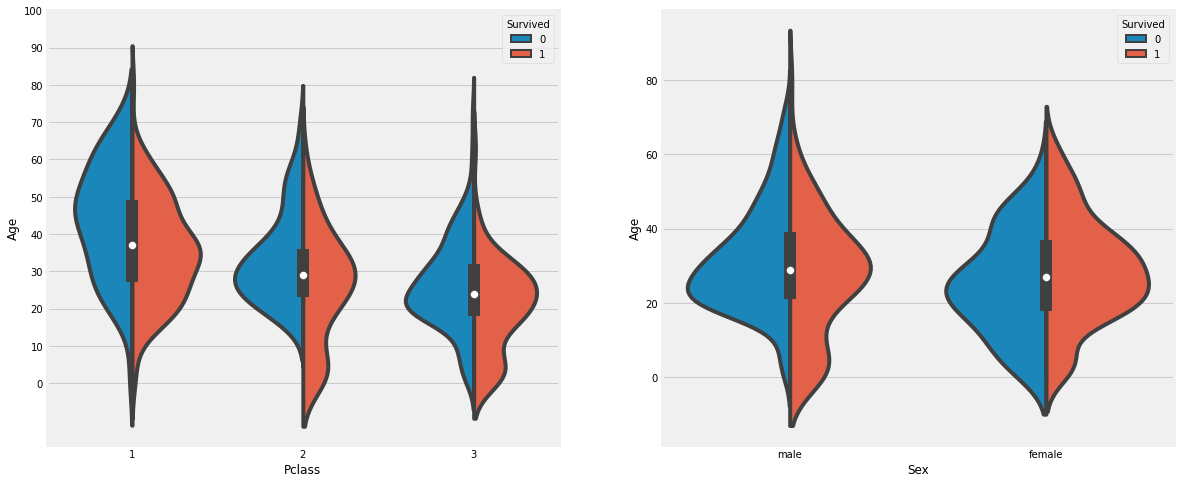

In [12]:
f, ax = plt.subplots(1,2,figsize = (18, 8))
sns.violinplot('Pclass','Age', hue = 'Survived', data= data, split = True, ax = ax[0])
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', data= data, split = True, ax = ax[1])
plt.show()

- age에는 177개의 null데이터가 존재함, 이 값들을 채우기 위해선 평균값을 사용할 수도 있지만 차이가 너무 난다. 4살을 29살로 지정할 수도 있다.
- 해결방법으로 이름을 보고 나이의 평균값을 각각의 그룹으로 지정할 수 있다. 
- !! 중요 !! 미국은 Mr,Mrs, Dr, Major 등 나이를 특정할 수 있는 부분이 있다. 

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # 정규식 사용, dot(.)뒤에 문자열 찾기

test['Initial'] = 0
for i in test:
    test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'cool')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 철자가 틀린 Mile, Mme들이 있어 범주화 시킨다.

In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- 이제 null data를 채우면 된다. 

In [17]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

test.loc[(test.Age.isnull())&(test.Initial == 'Mr'), 'Age'] =33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age']=36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age']=5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age']=46

In [18]:
data.Age.isnull().any() 
test.Age.isnull().any()

False

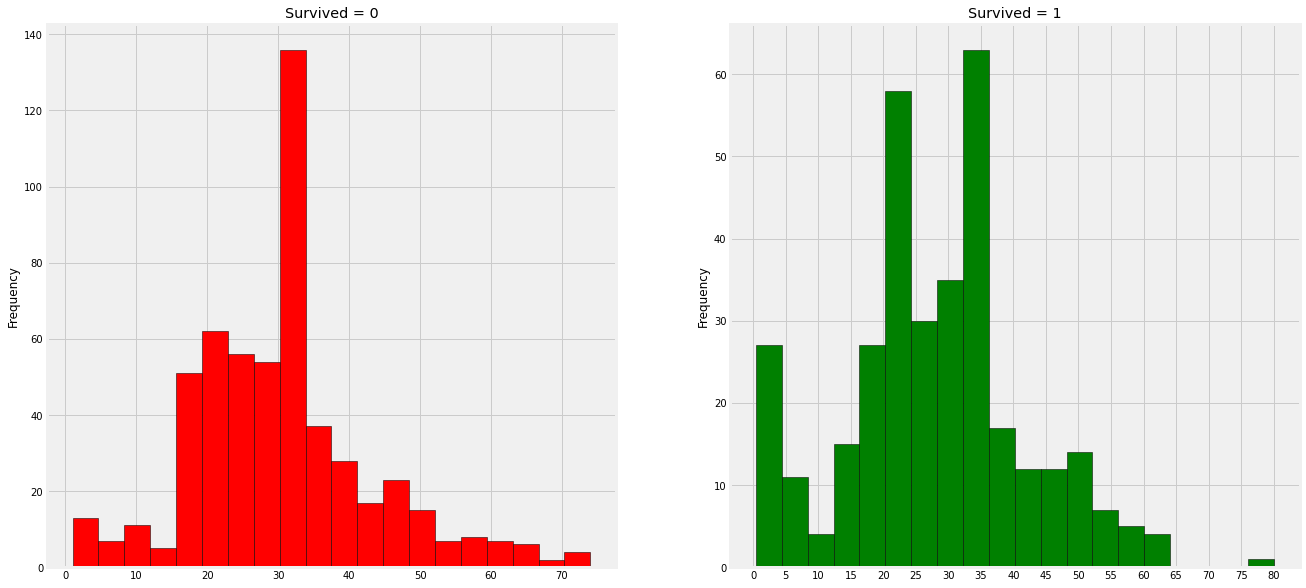

In [19]:
f,ax = plt.subplots(1,2,figsize = (20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor = 'black', color = 'red')  # bin : 막대의 개수 조절
ax[0].set_title('Survived = 0')
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green',edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0,85,5))
plt.show()

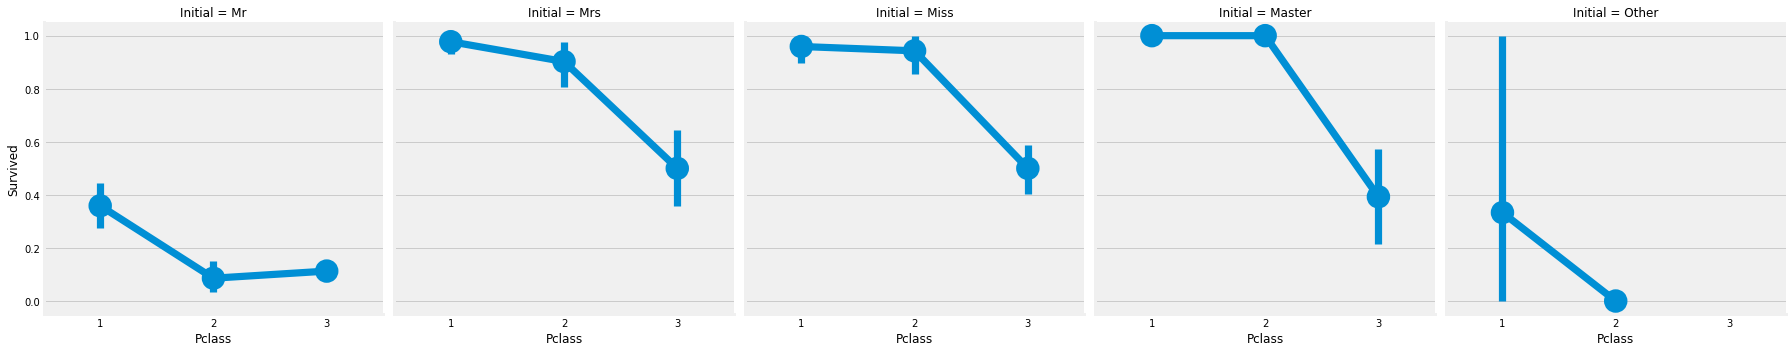

In [20]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data =data)
plt.show()

- 여성과 아동들이 많이 살았음,
### Embarked -> Categorical Value

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap='summer_r')

- 항구마다 생존 가능성

- gcf는 get current figure의 약어로,figure를 확인하기 위한 방법으로는 plt.gcf()를 사용한다.

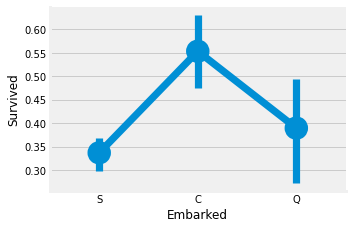

In [22]:
sns.factorplot('Embarked','Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- 위 그림은 생존확률을 표현, C가 가장 높고 S가 가장 낮다

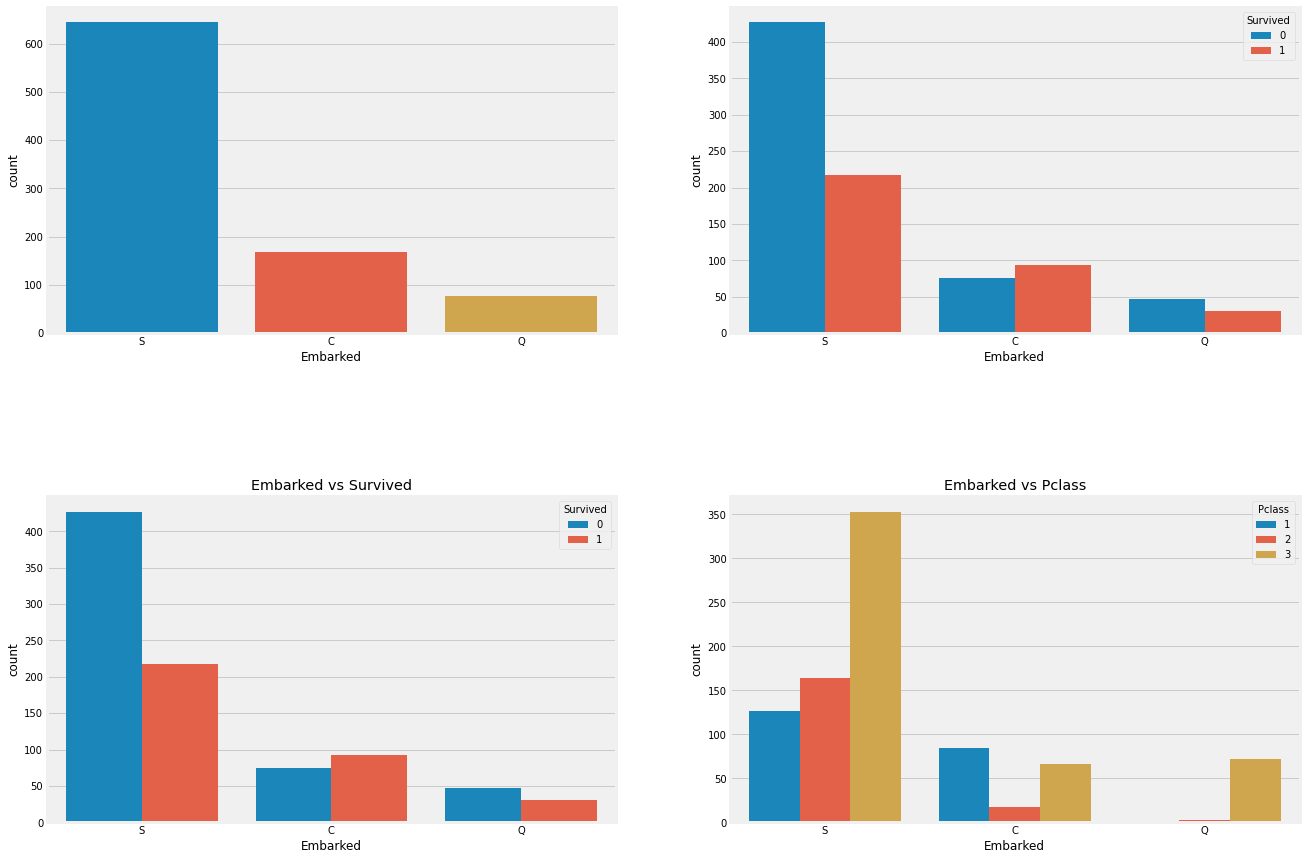

In [23]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
sns.countplot('Embarked', hue = 'Survived', data=data, ax=ax[0,1])
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- S항구에서 가장 많이 탑승했고, 그중 대부분이 Pclass 3이다
- C항구에서 탑승한 승객의 생존율이 가장 좋다
- S항구에서 부자들이 많이 탑승했지만 생존율이 낮은 이유는 Pclass3의 비율이 많기 때문이다.

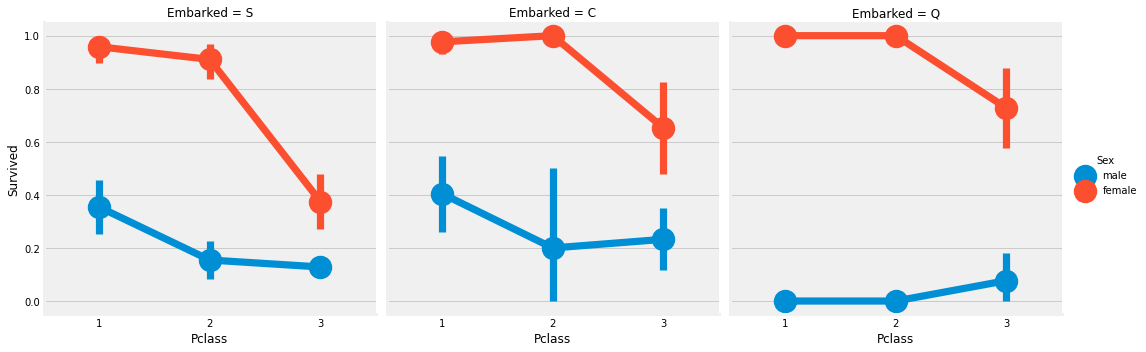

In [24]:
sns.factorplot('Pclass', 'Survived',hue = 'Sex', col = 'Embarked', data =data)
plt.show()

### null data를 채우기
- S항구에서 탄 사람들이 가장 많으니 Embarked 의 null데이터는 S로 채우기

In [25]:
data['Embarked'].fillna('S', inplace = True)
# inplace = True :  원본 df를 보존하지 않고 바로 변경된 데이터를 채워 넣는다
test['Embarked'].fillna('S', inplace = True)

In [26]:
data.Embarked.isnull().any()
data.Embarked.isnull().any()

False

### SibSip -> discrete Feature(이산 데이터) == categorical data
- 가족을 나타내는 특성

In [27]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap = 'summer_r')
#  SibSp가 0명이라는 뜻은 혼자 옴

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


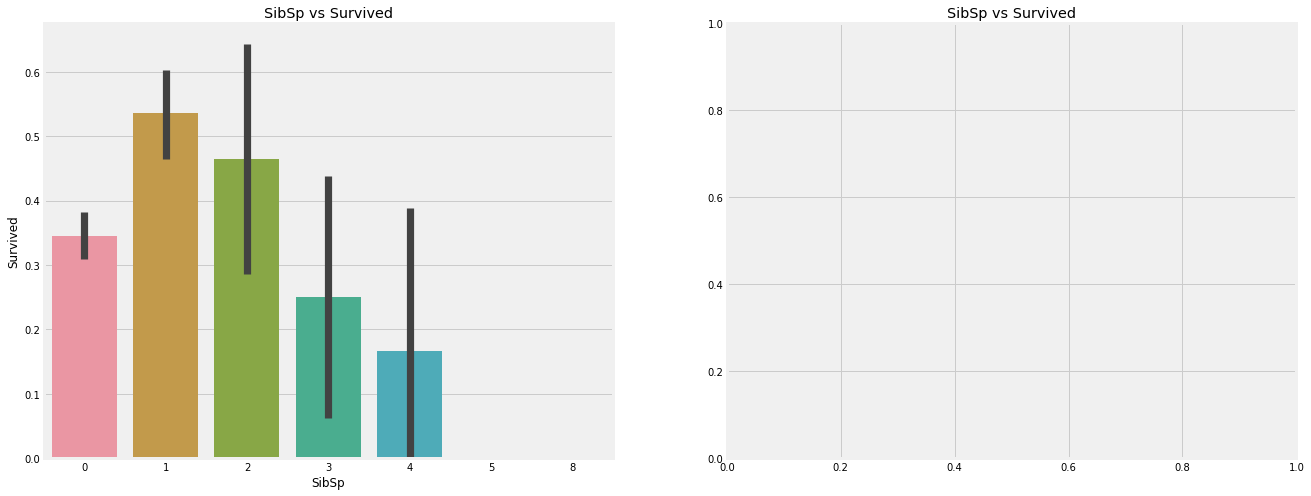

In [28]:
f, ax = plt.subplots(1,2,figsize = (20,8))
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1]) # 원래 plt로 표현 안되는거 아닌가..?
ax[1].set_title('SibSp vs Survived')
plt.close(2) # 그림을 지우는 함수
plt.show()
# 그림대로 안 나옴

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Fare -> continous Feature

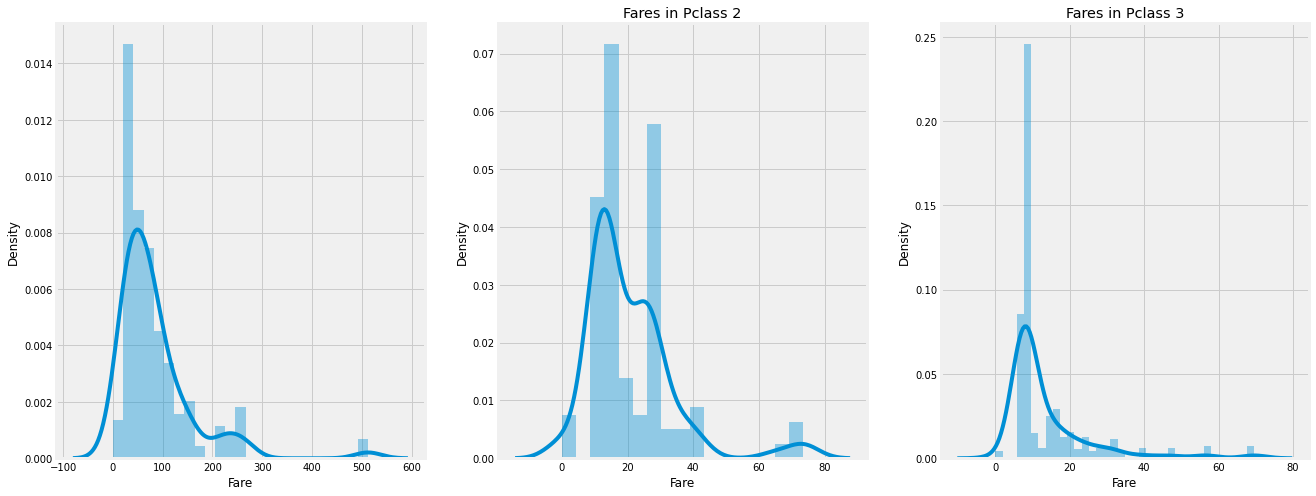

In [30]:
f, ax = plt.subplots(1,3,figsize = (20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- Sex : 여성의 경우 생존확률 높음
- Pclass : 1등석이 생존확률 높음
- Age : 5-10살들은 많이 살고 15-35 살들은 많이 죽음
- Embarked : Pclass1 승객들이 대부분 S에서 탑승했지만 C항구가 더 생존 가능성이 높음
- Parch+SibSp : 혼자 여행보다 1-2명의 자녀, 1-3명의 부모들과 같이 여행하는 것이 생존가능성 높음

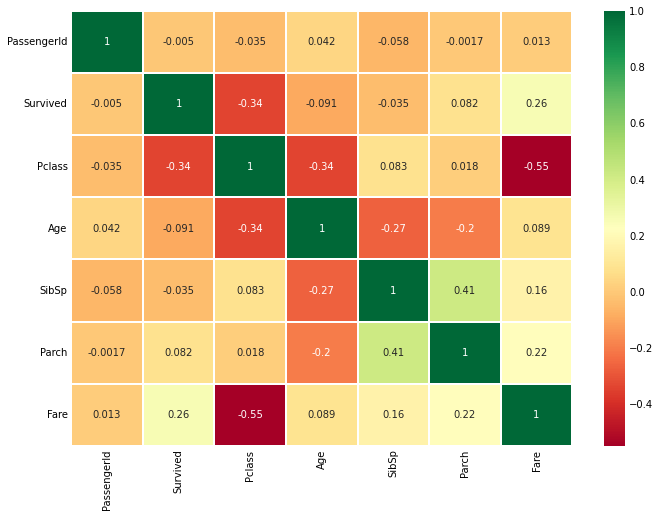

In [31]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2) 
# annot = True : 칸 안에 숫자 표현
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- heatmap의 특징
    - 알파벳이나 문자열의 상관관계는 불분명하기 때문에 숫자적인 특성들만 비교하는 것


## Feature Engineering
### Age Band

- Age는 연속적인 데이터여서 머신러닝 모델이 학습할 때 문제가 생긴다 
    - Eg : 만약 스포츠선수들을 성별에 따라 나누라고 하면 남자, 여자로 나누면 된다.
    - 하지만 나이에 따라 나누라고 하면 기준이 불분명해진다. 
- 그래서 continous data를 정규화나 Binning(구간화)를 통해 categorical data로 바꿔야 한다 
- 나이가 0~80세 까지 있으니 16을 기준으로 구간화를 한다

In [32]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

test['Age_band'] = 0
test.loc[test['Age']<=16, 'Age_band'] = 0
test.loc[(test['Age']>16)&(test['Age']<=32), 'Age_band']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_band']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_band']=3
test.loc[test['Age']>64,'Age_band']=4

In [33]:
data.Age_band.value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


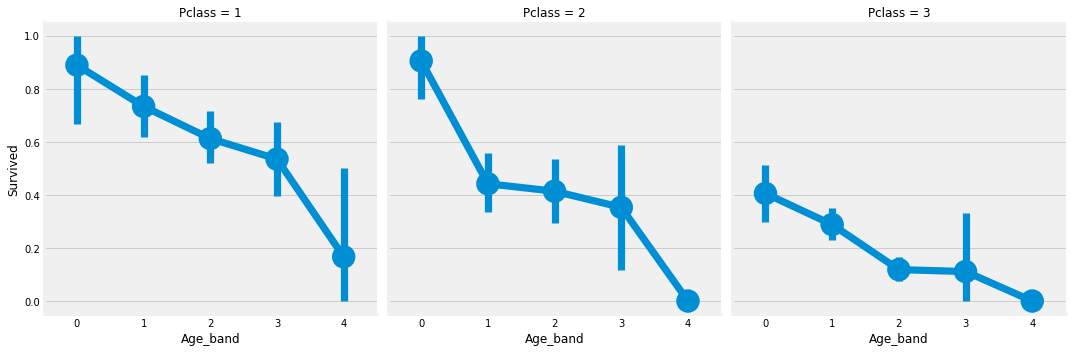

In [34]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')

- Pclass와 관계없이 나이가 증가하면 생존률은 감소함
### Family_Size and Alone
- SibSp와 Parch의 데이터를 합쳐서 하나의 데이터로 표현, 생존률이 가족크기와 관련이 있는지 확인

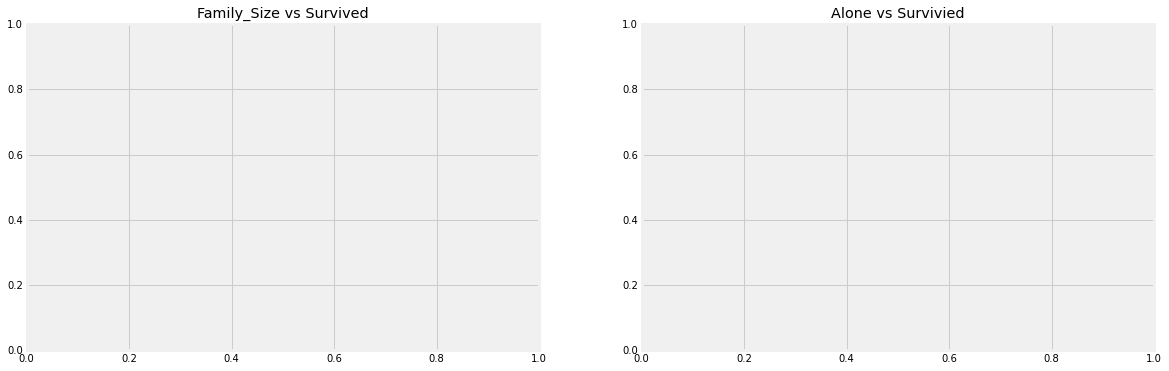

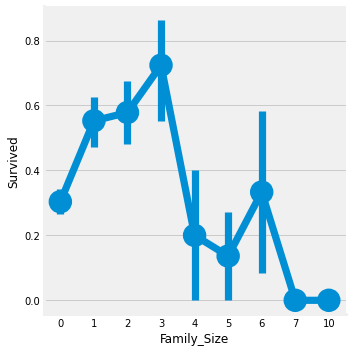

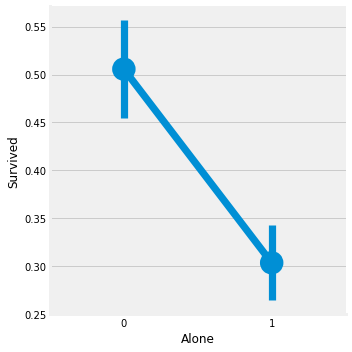

In [35]:
data['Family_Size']=0
data['Family_Size']= data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0 ,'Alone']=1

test['Family_Size']=0
test['Family_Size'] = data['Parch'] + data['SibSp']
test['Alone'] = 0
test.loc[test.Family_Size == 0, 'Alone']=1

f, ax = plt.subplots(1,2,figsize = (18,6))
sns.factorplot('Family_Size', 'Survived',data = data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survivied')
#plt.close(2)
#plt.close(3)
plt.show()
# 왜 pyplot그림 위에 올라가지 않는거지?

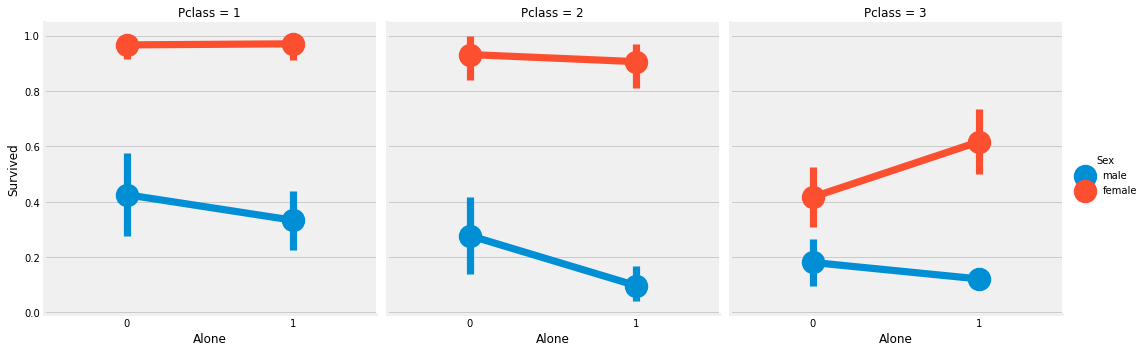

In [36]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

### Fare_Range
- fare도 age처럼 continous데이터이므로 ordinal data로 바꿔주어야 함
- qcut : 샘플들을 분위수(4분위, 2분위)로 나눔
- cut은 데이터를 동일한 길이로 나누는 것이고 qcut은 동일한 갯수로 나누는 것이다.

In [37]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

test['Fare_Range'] = pd.qcut(test['Fare'],4)

In [38]:
data['Fare_Range_cut'] = pd.cut(data['Fare'],4)
data.groupby(['Fare_Range_cut'])['Survived'].mean().to_frame()
# cut 예시, 실제 cut메서드를 사용하면 불균형이 옴

,Survived
Fare_Range_cut,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


- fare_range가 높을수록 생존가능성도 높아진다

In [39]:
data['Fare_cut'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cut']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cut']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cut']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cut']=3

test['Fare_cut'] = 0
test.loc[test['Fare']<=7.91, 'Fare_cut']=0
test.loc[(test['Fare']>7.91)&(test['Fare']<=14.454),'Fare_cut']=1
test.loc[(test['Fare']>14.454)&(test['Fare']<=31),'Fare_cut']=2
test.loc[(test['Fare']>31)&(test['Fare']<=513),'Fare_cut']=3

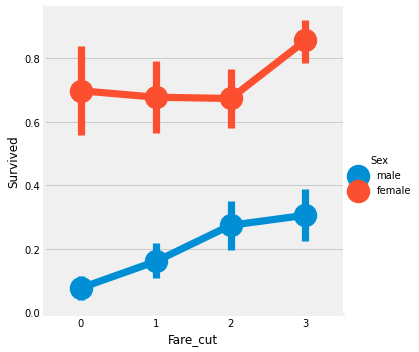

In [40]:
sns.factorplot('Fare_cut', 'Survived', data = data, hue = 'Sex')
plt.show()

### Converting String Values into Numeric
- 이제 Sex의 male, female같은 결과를 숫자로 바꿔야한다

In [41]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace = True)

test['Sex'].replace(['male', 'female'], [0,1], inplace = True)
test['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)
test['Initial'].replace(['Mr', 'Mrs', 'Miss','Master','Other'], [0,1,2,3,4], inplace = True)

### 필요없는 데이터 삭제
- name -> 범주형데이터로 바뀌지 않으므로 삭제
- age -> age_band열이 있으므로 age열은 필요없음
- Ticket -> 랜덤한 문자열이므로 범주화가 안된다
- fare -> 이미 Fare_cut의 열을 만들어서 fare열은 필요없음
- cabin -> null data도 많고 손님당 여러 객실을 가지고 있어서 못사용
- fare_range -> 이미 fare_cut를 가지고 있음
- Passengerld -> 분류불가능

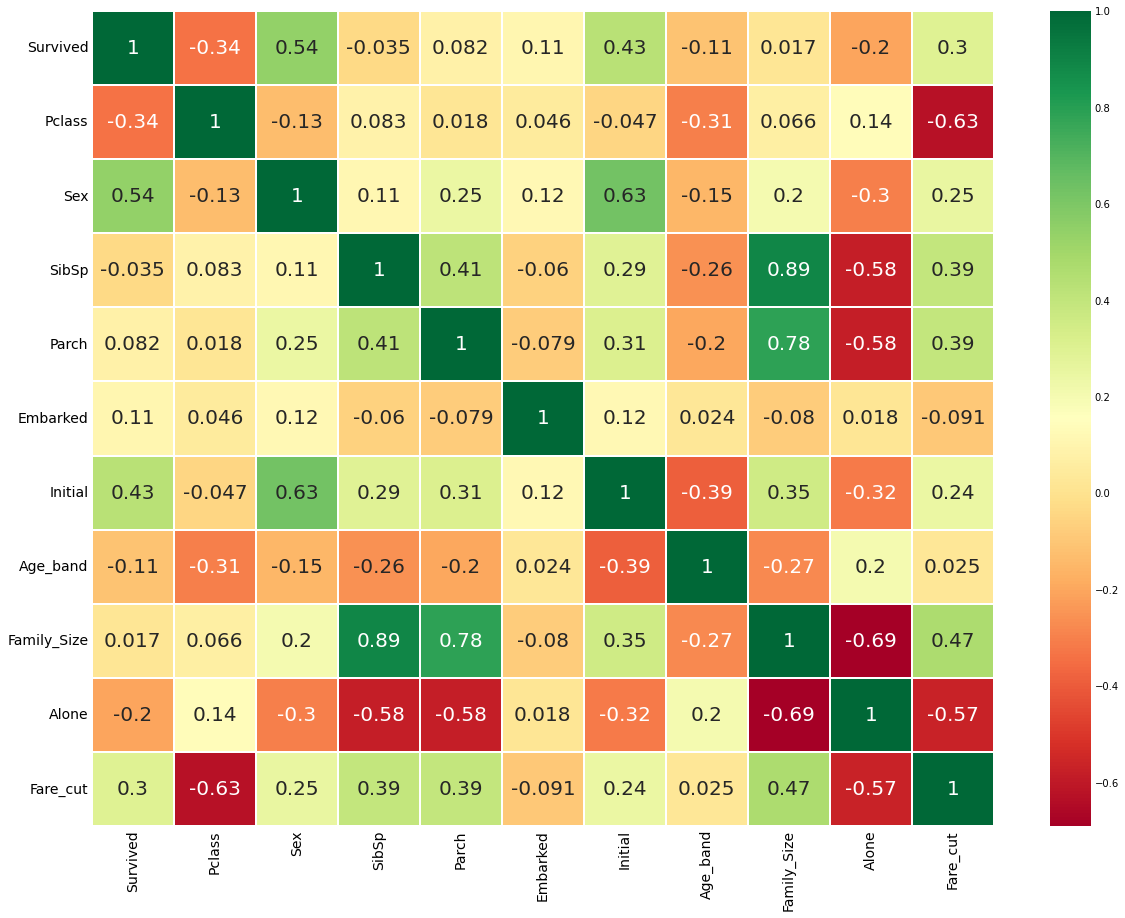

In [42]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin','Fare_Range', 'PassengerId', 'Fare_Range_cut'], axis = 1, inplace = True)
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

test.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin','Fare_Range', 'PassengerId'], axis = 1, inplace = True)

- SibSp andd Family_Size and Parch and Family_Sized은 긍정적 반응
- Alone and Family_Size.은 부정적 반응들을 보여줌
### Predictive Modeling

In [43]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cut
0,3,0,0,0,2,0,2,1,0,0
1,3,1,1,0,0,1,2,1,0,0
2,2,0,0,0,2,0,3,0,1,1
3,3,0,0,0,0,0,1,1,0,1
4,3,1,1,1,0,1,1,0,1,1


In [44]:
data.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cut
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1
5,0,3,0,0,0,2,0,2,0,1,1
6,0,1,0,0,0,0,0,3,0,1,3
7,0,3,0,3,1,0,3,0,4,0,2
8,1,3,1,0,2,0,1,1,2,0,1
9,1,2,1,1,0,1,1,0,1,0,2


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

1. 행번호(row number)로 선택하는 방법 (.iloc)
2. label이나 조건표현으로 선택하는 방법 (.loc)

In [46]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]] # survived 행 제외
train_Y = train[train.columns[:1]] # 앞에서부터 열 추가, 즉 Survived 열만 포함
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf_SVM)

In [47]:
model = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print(metrics.accuracy_score(prediction1, test_Y))

0.832089552238806


### Linear Support Vector Machine(linear-SVM)

In [48]:
model = svm.SVC(kernel ='linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print(metrics.accuracy_score(prediction2, test_Y))

0.8171641791044776


### Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [50]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


### K-Nearest Neighbors(KNN)

In [51]:
model=KNeighborsClassifier(n_neighbors = 9)
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8470149253731343


### K-Nearest Neighbors의 속성 조절(n_neighbors 조절)
- n_neighbors는 주변 이웃수 조절

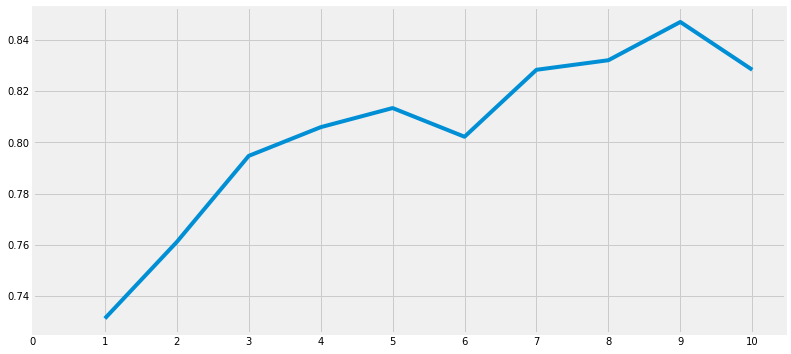

In [52]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

- n_neighbor이 9일때 정확도가 제일 높다

### Random Forests

In [53]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print(metrics.accuracy_score(prediction6, test_Y))

0.8171641791044776


### Cross Validation

In [54]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state = 22,shuffle=True)
xyz=[]
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    # cv : 교차검증수, scoring : 예측 성능 평가 지표
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.805855,0.044296
Random Forest,0.812609,0.051081


<AxesSubplot:>

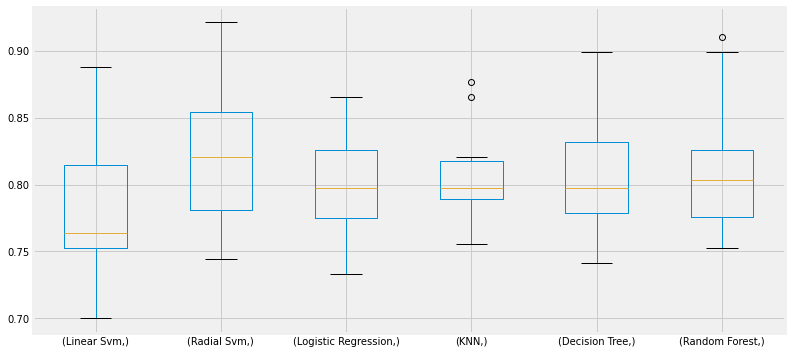

In [55]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

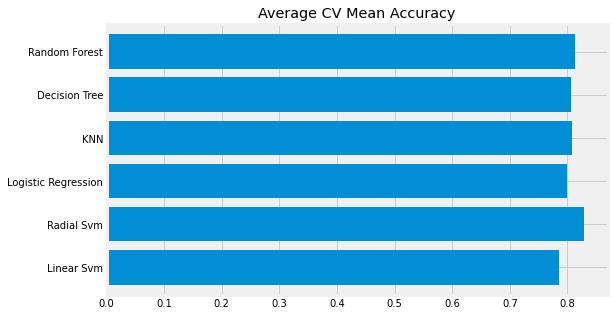

In [56]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

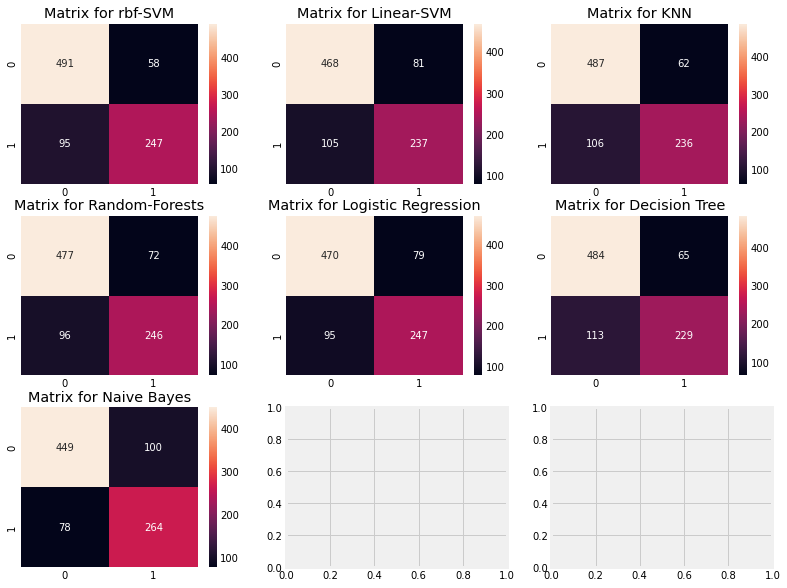

In [57]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

- 오른쪽 대각선이 모델이 한 정확한 예측, 왼쪽 대각선은 모델이 틀린 예측
    - 오른쪽 대각선 위 (왼쪽 위) - 생존한 인원을 정확히 맞춤
    - 오른쪽 대각선 아래 (오른쪽 아래) - 죽은 인원을 정확히 맞춤
    - 왼쪽 대각선 위(오른쪽 위) - 생존자를 사망자로 분류
    - 왼쪽 대각선 아래(왼쪽 아래) - 사망자를 생존자로 분류

### 하이퍼 파라미터 튜닝 
- SVM
- Random forest


In [58]:
from sklearn.model_selection import GridSearchCV
C =[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel' : kernel, 'C' : C, 'gamma':gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [59]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


### Ensembling
1. Voting Classifier
2. Bagging
3. Boosting

In [60]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.823820224719101


### Bagging
- KNN
- Decision Tree

In [61]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
# base_estimator : 평가할 하나의 모델, n_estimators : 데이터 세트를 몇개 만드는지
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [62]:
moedel = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.832089552238806
The cross validated score for bagged Decision Tree is: 0.8104244694132333


### Boosting
- AdaBoost(Adaptive Boosting)
- Stochastic Gradient Boosting
- XGBoost
- Hyper-Parameter Tuning for AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result =cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [65]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[08:17:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:17:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:18:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:18:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### AdaBoosting 의 하이퍼파라미터를 튜닝하기

In [66]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


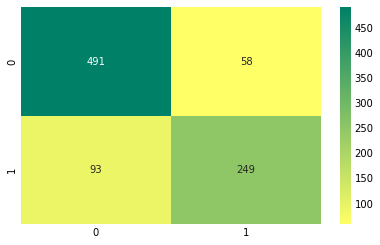

In [67]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 0, learning_rate = 0.05)
result = cross_val_predict(ada, X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, result), cmap='summer_r', annot = True, fmt = '2.0f')
plt.show()

[08:27:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


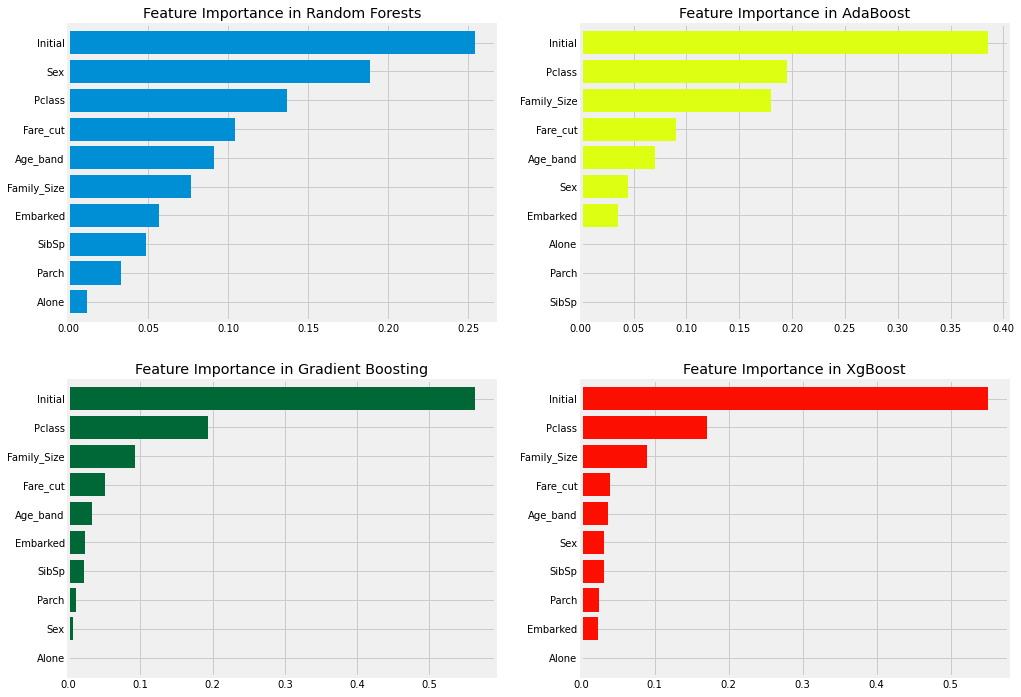

In [68]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

- 일반적으로 중요한 기능에는 Initial, Sex, Pclass등이 있다. 
-  Initial 기능을 볼 수 있습니다.우리는 이미 Sex와 Initial의 긍정적인 상관관계를 보았기 때문에 둘 다 성별을 언급하고 있습니다.
- Sex는 randomforest에만 중요해 보인다. 
- 각 모델들에 대해서 공부할 수 있었고 모델 위주로 1번 더 반복하자